# Twitter Data Sentiment Analysis

# Importing Essential Libraries

In [1]:
#importing libraries
import numpy as np # for numeric calculation
import pandas as pd # for data manupulation or analysis
import sklearn as sk # for training and testing data
import matplotlib.pyplot as plt # for data visualization
from googletrans import Translator # for multilingual purpose
from nltk.sentiment.vader import SentimentIntensityAnalyzer # for analysing sentiment 

In [2]:
translator = Translator()
samarth=SentimentIntensityAnalyzer()

# Data Loading

In [25]:
# load twitter data
file = pd.read_csv('D:/Sentiment Analysis/aktu.csv')

# Data Presentation before Cleaning Data

In [26]:
file.keys() # Displaying dataframe keys

Index(['language', 'location', 'text'], dtype='object')

In [27]:
file.info() # Displaying dataframe Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   language  12 non-null     object
 1   location  9 non-null      object
 2   text      12 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [28]:
file # Displaying dataframe

,language,location,text
0,NaN,NaN,NaN
1,en,"Chicago, IL",@shekgar @RajiIndustani They are not getting s...
2,NaN,NaN,NaN
3,en,NaN,@BaxiShachi @AmitShah @narendramodi Dont you g...
4,NaN,NaN,NaN
5,en,"Rajpura, India",@rssurjewala Sir must push BJP to wall with in...
6,NaN,NaN,NaN
7,en,"Rajpura, India",@RahulGandhi Must push bjp to wall with fuel p...
8,NaN,NaN,NaN
9,en,NaN,Why is there unprecedented martyred of our Jaw...


In [29]:
type(file)

pandas.core.frame.DataFrame

In [30]:
# Shape of dataframe before Cleaning Data
file.shape

(24, 3)

In [31]:
file.describe()

,language,location,text
count,12,9,12
unique,1,5,10
top,en,"Lahore, Pakistan",@Lovernova1 @vishj05 But that was again your p...
freq,12,3,3


In [33]:
file.isnull().sum()

0                                                   NaN
1     @shekgar @RajiIndustani They are not getting s...
2                                                   NaN
3     @BaxiShachi @AmitShah @narendramodi Dont you g...
4                                                   NaN
5     @rssurjewala Sir must push BJP to wall with in...
6                                                   NaN
7     @RahulGandhi Must push bjp to wall with fuel p...
8                                                   NaN
9     Why is there unprecedented martyred of our Jaw...
10                                                  NaN
11    @SRMa64117330 @AnshumanSail I think this itsel...
12                                                  NaN
13    @RajiIndustani But people have to vote for BJP...
14                                                  NaN
15    @Ravinder536R @Swamy39 Manmohan Singh as PM ‘a...
16                                                  NaN
17    " NEW DELHI: Amid the raging controversy o

# Cleaning Dataframe

In [34]:
# it is used to remove null values
file.dropna(inplace=True)
empty=[]
for i,lang,loc,txt in file.itertuples():
    if(type(txt)==str):
        if(txt.isspace()):
            empty.append(i)
file.drop(empty, inplace=True)

In [35]:
# it is used to delete duplicate values
file = file.drop_duplicates(subset=None,keep="first")

# Data Presentation after Cleaning Data

In [36]:
file.keys() # Displaying dataframe keys

Index(['language', 'location', 'text'], dtype='object')

In [37]:
file.info() # Displaying dataframe Information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   language  7 non-null      object
 1   location  7 non-null      object
 2   text      7 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [38]:
file # Displaying dataframe

,language,location,text
1,en,"Chicago, IL",@shekgar @RajiIndustani They are not getting s...
5,en,"Rajpura, India",@rssurjewala Sir must push BJP to wall with in...
7,en,"Rajpura, India",@RahulGandhi Must push bjp to wall with fuel p...
11,en,"Kerala, India",@SRMa64117330 @AnshumanSail I think this itsel...
13,en,"Chicago, IL",@RajiIndustani But people have to vote for BJP...
15,en,Chennai,@Ravinder536R @Swamy39 Manmohan Singh as PM ‘a...
19,en,"Lahore, Pakistan",@Lovernova1 @vishj05 But that was again your p...


In [39]:
type(file)

pandas.core.frame.DataFrame

In [40]:
file.shape

(7, 3)

In [41]:
file.describe()

,language,location,text
count,7,7,7
unique,1,5,7
top,en,"Rajpura, India",@RahulGandhi Must push bjp to wall with fuel p...
freq,7,2,1


In [42]:
file.isnull().sum()

language    0
location    0
text        0
dtype: int64

# Converting all tweets to Single Language (English)

In [43]:
def multilingual(a):
    try:
        print(a)
        return(translator.translate(a, dest="en").text)
    except:
        print(a)
        return(a)

In [44]:
file['new'] = file['text'].apply(lambda review: multilingual(review))

@shekgar @RajiIndustani They are not getting support from Tamilnadu Hindus.  What can BJP do without ground support… https://t.co/BX4U9J8DMx
@rssurjewala Sir must push BJP to wall with increasing fuel prices https://t.co/Y0QvjESOyG
@RahulGandhi Must push bjp to wall with fuel prices sir https://t.co/QWQOAduV31
@SRMa64117330 @AnshumanSail I think this itself proves what happened. There is no need for investigation. This has… https://t.co/vFMAf1IG5b
@RajiIndustani But people have to vote for BJP and show some support.  Otherwise what can BJP do?  TN should realiz… https://t.co/euIEYbTylJ
@Ravinder536R @Swamy39 Manmohan Singh as PM ‘abjectly surrendered’ India's land to China, presided over 600 incursi… https://t.co/NXCZ27MEmC
@Lovernova1 @vishj05 But that was again your people who voted for BJP and opted these stupids to ruin and driving India to hell.


<ipython-input-44-7de18f1a9126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['new'] = file['text'].apply(lambda review: multilingual(review))


In [21]:
file['new'] # Displaying new dataframe

0       @bsp_13 ...like your head hanging upside down ...
1                 @bsp_13 yeah back on the land line days
2                                 @bsp_13 Omg ur smile 😊😬
3       @bsp_13 i do that shit when im stoned all the ...
4                           @mnjshaffe The BSP is special
                              ...                        
1994    @defnotGG @EasterSnoopy @BankruptWebGoof @That...
1995    @EasterSnoopy @bsp_13 @BankruptWebGoof @ThatDa...
1998    @BankruptWebGoof @ThatDaveBrown my mother leav...
1999                           @bsp_13 i enjoy your jokes
2000                 @ThatDaveBrown @bsp_13 Who’s Simone?
Name: new, Length: 1468, dtype: object

# Predicting Polarity, Score, Compound Score

In [20]:
file['scores'] = file['new'].apply(lambda review: samarth.polarity_scores(review)) # Calculating polarity
file['compound'] = file['scores'].apply(lambda score_dict: score_dict["compound"])
file['Comp_score'] = file['compound'].apply(lambda score: "pos" if score>0 else ("neu" if score==0 else "neg"))

<ipython-input-20-df89a41a5aa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['scores'] = file['text'].apply(lambda review: samarth.polarity_scores(review)) # Calculating polarity
<ipython-input-20-df89a41a5aa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['compound'] = file['scores'].apply(lambda score_dict: score_dict["compound"])
<ipython-input-20-df89a41a5aa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [23]:
file # Displaying New File

,language,location,text,new,scores,compound,Comp_score
0,en,"Ladner, BC, 🇨🇦",@bsp_13 ...like your head hanging upside down ...,@bsp_13 ...like your head hanging upside down ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,en,"Boston, MA",@bsp_13 yeah back on the land line days,@bsp_13 yeah back on the land line days,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",0.2960,pos
2,en,"Buffalo, NY",@bsp_13 Omg ur smile 😊😬,@bsp_13 Omg ur smile 😊😬,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.3612,pos
3,en,"Huntington Beach, CA",@bsp_13 i do that shit when im stoned all the ...,@bsp_13 i do that shit when im stoned all the ...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.5574,neg
4,en,T-Clem,@mnjshaffe The BSP is special,@mnjshaffe The BSP is special,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.4019,pos
...,...,...,...,...,...,...,...
1994,en,"Boston, MA",@defnotGG @EasterSnoopy @BankruptWebGoof @That...,@defnotGG @EasterSnoopy @BankruptWebGoof @That...,"{'neg': 0.136, 'neu': 0.432, 'pos': 0.432, 'co...",0.5859,pos
1995,en,#BJBSJ Headquarters,@EasterSnoopy @bsp_13 @BankruptWebGoof @ThatDa...,@EasterSnoopy @bsp_13 @BankruptWebGoof @ThatDa...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.6065,neg
1998,en,"Boston, MA",@BankruptWebGoof @ThatDaveBrown my mother leav...,@BankruptWebGoof @ThatDaveBrown my mother leav...,"{'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compou...",-0.2960,neg
1999,en,"Boston,MA",@bsp_13 i enjoy your jokes,@bsp_13 i enjoy your jokes,"{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'comp...",0.6369,pos


# Data Visualization

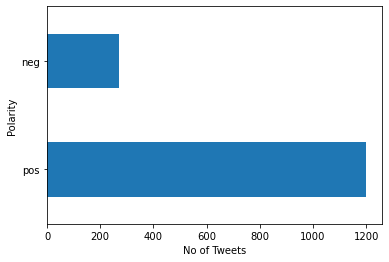

In [24]:
file['Comp_score'].value_counts().plot(kind='barh')
plt.ylabel('Polarity') # Labeling y-axis
plt.xlabel("No of Tweets") # labeling x-axis
plt.show() # Display data in the form of Graph

# Appling Different Sentiment Algorithm for testing their Accuracy

#### Dataset used here for testing and traing different Sentiment Algorithm is "Amazon Review Dataset"

## Data Manupulation

In [3]:
raw_data = pd.read_csv("tweets1.csv") # Loading amazonreview dataset

In [4]:
from sklearn.model_selection import train_test_split # inporting library
x_train, x_test, y_train, y_test = train_test_split(raw_data['text'], raw_data['label'], test_size=0.2, random_state=5) # splitting data into test and train

In [5]:
raw_data.keys() # Displaying information

Index(['tweet_id', 'label', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'text', 'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   label                         14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(3), object(9)
memory usage: 1.3+ MB


In [7]:
raw_data.shape # Displaying Shape

(14640, 12)

In [8]:
raw_data.describe() # Decribing data

,tweet_id,airline_sentiment_confidence,negativereason_confidence
count,1.464000e+04,14640.000000,10522.000000
mean,5.692605e+17,0.900169,0.638298
std,8.098842e+14,0.162830,0.330440
min,5.680000e+17,0.335000,0.000000
25%,5.690000e+17,0.692300,0.360600
50%,5.690000e+17,1.000000,0.670600
75%,5.700000e+17,1.000000,1.000000
max,5.700000e+17,1.000000,1.000000


In [9]:
raw_data.isnull().sum()

tweet_id                            0
label                               0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
text                                0
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
raw_data

,tweet_id,label,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,text,tweet_created,tweet_location,user_timezone
0,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,cairdin,@VirginAmerica What @dhepburn said.,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,@VirginAmerica plus you've added commercials t...,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,positive,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,@VirginAmerica it's really aggressive to blast...,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,@VirginAmerica and it's a really big bad thing...,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.700000e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,@AmericanAir thank you we got on a different f...,22-02-2015 12:01,NaN,NaN
14636,5.700000e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,@AmericanAir leaving over 20 minutes Late Flig...,22-02-2015 11:59,Texas,NaN
14637,5.700000e+17,positive,1.0000,NaN,NaN,American,NaN,sanyabun,@AmericanAir Please bring American Airlines to...,22-02-2015 11:59,"Nigeria,lagos",NaN
14638,5.700000e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,"@AmericanAir you have my money, you change my ...",22-02-2015 11:59,New Jersey,Eastern Time (US & Canada)


In [11]:
x_train

11650    @USAirways 1 1/2 hours on hold to customer ser...
612          @united thanks for the info I already knew...
5074     @SouthwestAir flying flight 3130 tomorrow at 7...
6644     @SouthwestAir are you kidding me?  I needed he...
3285      @united happens every time in and out of Newark.
                               ...                        
3046     @united gates were DEFINITELY NOT FULL. We wer...
9917     @USAirways No I need the corporate office numb...
4079     @united was told by Supervisor that United dis...
2254     @united how come a $27 shuttle bus from LGA to...
2915                             @united well played, ^LO.
Name: text, Length: 10248, dtype: object

In [12]:
x_test

111      @VirginAmerica has getaway deals through May, ...
9369     @USAirways Thanks but when I asked for a chang...
3113                     @united maybe on my return trip 👍
7235     @JetBlue no I asked. Either way it doesn't mak...
5002     @SouthwestAir Totally ruined my birthday weeke...
                               ...                        
9560     @USAirways @AmericanAir I need to move a reser...
6952     @JetBlue @MrJustyn I heard companies were stud...
1260     @united I have been told twice my issue has be...
11513    @USAirways YOU ARE THE BEST!!! FOLLOW ME PLEAS...
774      @united that's unfortunate. The @Tumitravel wa...
Name: text, Length: 4392, dtype: object

In [13]:
y_train

11650    negative
612      positive
5074     positive
6644     negative
3285     positive
           ...   
3046     negative
9917     positive
4079     negative
2254     negative
2915     positive
Name: label, Length: 10248, dtype: object

In [26]:
y_test

111      positive
9369     negative
3113     positive
7235     negative
5002     negative
           ...   
3943     negative
14471    negative
12680    negative
4462     positive
11876    negative
Name: label, Length: 2928, dtype: object

## Vader Algorithm

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
raw_data['scores'] = raw_data['text'].apply(lambda reviews: samarth.polarity_scores(reviews))
raw_data['compound'] = raw_data['scores'].apply(lambda score_dict: score_dict["compound"])
raw_data['Comp_score'] = raw_data['compound'].apply(lambda score: "positive" if score>=0 else "negative")

In [29]:
cm = confusion_matrix(raw_data['label'], raw_data['Comp_score']) # confusion matrix
cm

array([[4627, 4551],
       [ 526, 4936]], dtype=int64)

In [30]:
classification_report(raw_data['label'], raw_data['Comp_score']) # classification report

'              precision    recall  f1-score   support\n\n    negative       0.90      0.50      0.65      9178\n    positive       0.52      0.90      0.66      5462\n\n    accuracy                           0.65     14640\n   macro avg       0.71      0.70      0.65     14640\nweighted avg       0.76      0.65      0.65     14640\n'

In [31]:
accuracy_score(raw_data['label'], raw_data['Comp_score']) # accuracy

0.6532103825136611

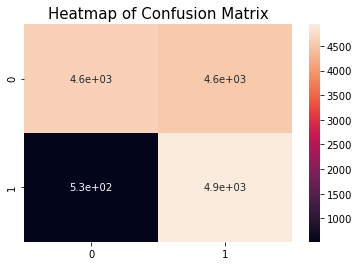

In [32]:
# Visualization of Confusion Matrix
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

## Support vector classifier

In [33]:
from sklearn import svm # importing Support vector classifier

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(raw_data['text'])
test_vectors = vectorizer.transform(raw_data['text'])

In [35]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, raw_data['label']) # training
prediction_linear = classifier_linear.predict(test_vectors) # testing

In [36]:
classification_report(raw_data['label'], prediction_linear, output_dict=True) # classification report

{'negative': {'precision': 0.900856665273715,
  'recall': 0.9395293092176945,
  'f1-score': 0.9197866666666666,
  'support': 9178},
 'positive': {'precision': 0.8904893449092344,
  'recall': 0.8262541193701941,
  'f1-score': 0.8571699905033239,
  'support': 5462},
 'accuracy': 0.8972677595628415,
 'macro avg': {'precision': 0.8956730050914747,
  'recall': 0.8828917142939443,
  'f1-score': 0.8884783285849953,
  'support': 14640},
 'weighted avg': {'precision': 0.8969887483453822,
  'recall': 0.8972677595628415,
  'f1-score': 0.8964251717756709,
  'support': 14640}}

In [37]:
accuracy_score(raw_data['label'], prediction_linear) # accuracy

0.8972677595628415

In [38]:
cm = confusion_matrix(raw_data['label'], prediction_linear) # confusion matrix
cm

array([[8623,  555],
       [ 949, 4513]], dtype=int64)

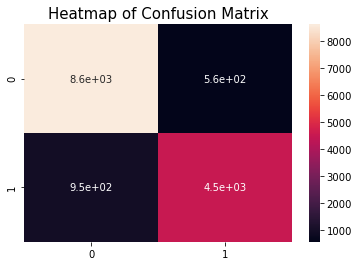

In [39]:
# Visualization of Confusion Matrix
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

## Naive_Bayes

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [41]:
score = 'f1_macro'
print("# Tuning hyper-parameters for %s" % score)
print()
np.errstate(divide='ignore')
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring=score)
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
for mean, std, params in zip(clf.cv_results_['mean_test_score'], 
                             clf.cv_results_['std_test_score'], 
                             clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()




# Tuning hyper-parameters for f1_macro

Best parameters set found on development set:

{'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

Grid scores on development set:

0.475 (+/-0.013) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}
0.460 (+/-0.019) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
0.494 (+/-0.026) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}
0.462 (+/-0.022) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}
0.454 (+/-0.020) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
0.506 (+/-0.029) for {'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}
0.690 (+/-0.029) for {'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range

In [42]:
classification_report(y_test, clf.predict(x_test), digits=4) # classification report

'              precision    recall  f1-score   support\n\n    negative     0.8214    0.9488    0.8805      1837\n    positive     0.8834    0.6526    0.7507      1091\n\n    accuracy                         0.8385      2928\n   macro avg     0.8524    0.8007    0.8156      2928\nweighted avg     0.8445    0.8385    0.8321      2928\n'

In [43]:
accuracy_score(y_test, clf.predict(x_test)) # accuracy

0.8384562841530054

In [44]:
cm = confusion_matrix(y_test, clf.predict(x_test)) # confusion matrix
cm

array([[1743,   94],
       [ 379,  712]], dtype=int64)

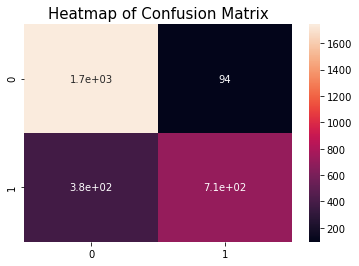

In [45]:
# Visualization of Confusion Matrix
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()